In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [16]:
data = pd.read_csv('1.02. Multiple linear regression.csv')
data.describe()

,SAT,GPA,"Rand 1,2,3"
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,2.059524
std,104.530661,0.271617,0.855192
min,1634.000000,2.400000,1.000000
25%,1772.000000,3.190000,1.000000
50%,1846.000000,3.380000,2.000000
75%,1934.000000,3.502500,3.000000
max,2050.000000,3.810000,3.000000


In [33]:
y = data['GPA']
x1= data[['SAT', 'Rand 1,2,3']]
x = sm.add_constant(x1)
result_rand = sm.OLS(y,x).fit()
result_rand.summary()
# new r squared is lower than for simple linear regression, thus we need to exclude Rand 1,2,3 from model

C:\tools\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     27.76
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           6.58e-10
Time:                        21:33:55   Log-Likelihood:                 12.720
No. Observations:                  84   AIC:                            -19.44
Df Residuals:                      81   BIC:                            -12.15
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2960      0.417      0.710      0.480      -0.533       1.125
SAT            0.0017      0.000      7.432      0.000       0.001       0.002
Rand 1,2,3    -0.0083      0.027     -0.304      0.762      -0.062       0.046
==============================================================================
Omnibus:                       12.992   Durbin-Watson:                   0.948
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.364
Skew:                          -0.731   Prob(JB):                     0.000280
Kurtosis:                       4.594   Cond. No.                     3.33e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Use dummy variables (categorical data)

In [18]:
raw_data = pd.read_csv('1.03. Dummies.csv')
raw_data.describe()
# attendace - yes, if higher than 75%

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [20]:
new_data = raw_data.copy()
new_data['Attendance'] = new_data['Attendance'].map({'Yes': 1, 'No': 0})
new_data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [21]:
y = new_data['GPA']
x1 = new_data[['SAT', 'Attendance']]
x= sm.add_constant(x1)
result = sm.OLS(y,x).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Wed, 16 Oct 2019   Prob (F-statistic):           2.19e-15
Time:                        21:01:44   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

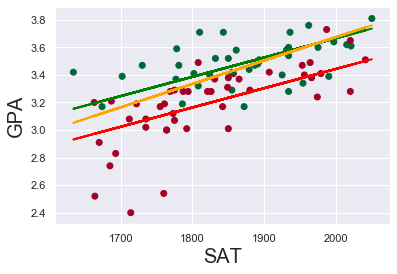

In [28]:
# unit constant and attendance to plot the data
sat = new_data['SAT']
gpa = new_data['GPA']
yhat_yes = (0.6439+0.2226) + 0.0014*sat
yhat_no = 0.6439 + 0.0014*sat
yhat_slr = 0.0017*sat + 0.275
fig = plt.plot(sat,yhat_yes, lw=2, c='green', label ='yhat_yes')
fig = plt.plot(sat,yhat_no, lw=2, c='red', label ='yhat_no')
fig = plt.plot(sat,yhat_slr, lw=2, c='orange', label ='yhat_slr')
plt.scatter(sat, gpa, c=new_data['Attendance'], cmap='RdYlGn')
plt.xlabel('SAT', fontsize=20)
plt.ylabel('GPA', fontsize=20)
plt.show()

## Make a prediction

In [30]:
# specify data to predict
predict_data=pd.DataFrame({'const': 1, 'SAT':[1700,1670], 'Attendance': [0,1]})
predict_data=predict_data[['const', 'SAT', 'Attendance']]
predict_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [31]:
predictions = result.predict(predict_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [38]:
predictions_df = pd.DataFrame({'Prediction': predictions}) # put data in data frame
joined = predict_data.join(predictions_df)
joined

,const,SAT,Attendance,Prediction
0,1,1700,0,3.023513
1,1,1670,1,3.204163
